<a href="https://colab.research.google.com/github/raj-jaiswal/Machine-Learning-Techniques/blob/main/Week_1_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-1

**Note to Learners**:

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

11490434/11490434 [==============================] - 1s 0us/step


## Problem-1

How many samples does the dataset have?

In [ ]:
# Enter your solution here
n = X.shape[0]
n

100

## Problem-2

How many features does the dataset have?

In [ ]:
# Enter your solution here
d = X.shape[1]
d

784

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

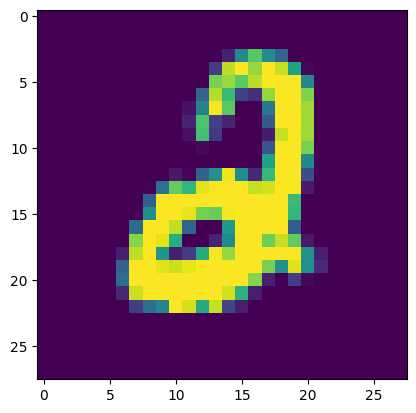

In [ ]:
# Enter your solution here
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

img_idx = 78
img = X[img_idx].reshape(28,28)
imgplot = plt.imshow(img)

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [ ]:
# Enter your solution here
means = X.mean(axis = 0).reshape(1, -1)
X_centered = X - means
sum = 0
for i in range(n):
  for j in range(d):
    sum += X_centered[i][j] ** 2
val = np.sqrt(sum) / n / d
val

0.23242174456564954

## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [ ]:
# Enter your solution here
cov = X_centered.T @ X_centered / n
sum = 0
for i in range(d):
  for j in range(d):
    sum += cov[i][j] ** 2
np.sqrt(sum) / (d ** 2)

1.3648061009232155

## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [ ]:
# Enter your solution here
eigen_values, eigen_vectors = np.linalg.eig(cov)

# Sort eigen values and eigen vectors in descending order of eigen values
idx = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]

w1 = eigen_vectors[:, 0]
w2 = eigen_vectors[:, 1]

w = w1 + w2

np.abs(np.sum(w))

1.0516243880598353

## Problem-7

Visualize the first principal component as an image.

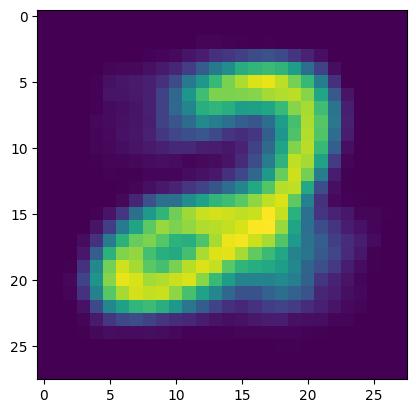

In [ ]:
# Enter your solution here
X_converted = X_centered @ w1
newImg = w1 * X_converted[img_idx].real + means
img = newImg.reshape(28,28)
vals=[]
for i in range(28):
  vals.append([])
  for j in range(28):
    vals[i].append(0)
for i in range(28):
  for j in range(28):
    vals[i][j] = img[i][j].real
imgplot = plt.imshow(np.array(vals))


## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [ ]:
# Enter your solution here
total = eigen_values.sum()
var = 0
k = 0
while var < 0.95:
  var += eigen_values[k] / total
  k += 1
k

53

## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



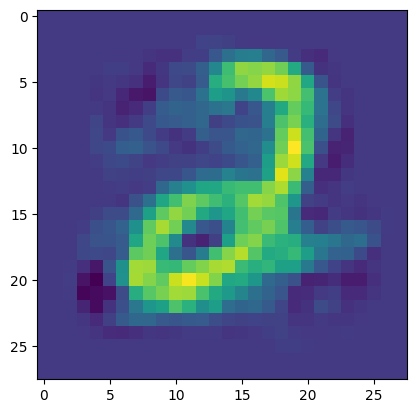

In [ ]:
# Enter your solution here
total = eigen_values.sum()
var = 0
k = 0
while var < 0.80:
  var += eigen_values[k] / total
  k += 1

img = np.zeros((1, 28*28))
nextX = X_centered

for i in range(k):
  w = eigen_vectors[:, i]
  nextX_converted = nextX @ w
  newImg = w * nextX_converted[img_idx].real
  nextX = nextX - newImg
  img = img + newImg

img = img + means
img = img.reshape(28,28)
vals=[]
for i in range(28):
  vals.append([])
  for j in range(28):
    vals[i].append(0)
for i in range(28):
  for j in range(28):
    vals[i][j] = img[i][j].real
imgplot = plt.imshow(np.array(vals))